<a href="https://colab.research.google.com/github/dhenifferraujo/Machine-Learning/blob/main/Ex2_Perceptron_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCC-ICMC-USP - 1o. semestre de 2021
# SCC5871/MAI5025 - Exercício 2

### Profa. Roseli A. F. Romero

### PAE: Guilherme V. Nardari



Text(0, 0.5, 'Eixo Y: Atributo 2')

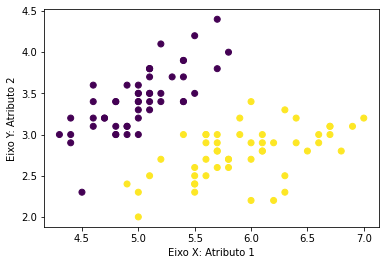

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
# Nessa primeira parte, vamos trabalhar apenas com as duas primeiras features e as duas primeiras classes
X = iris.data[:100, :2]
y = iris.target[:100]

plt.scatter(*X.T, c=y)
plt.xlabel('Eixo X: Atributo 1')
plt.ylabel('Eixo Y: Atributo 2')


### Questão 1.
Treine o perceptron no conjunto todo e visualize a fronteira de decisão do modelo como uma reta.

- Dica: O perceptron é um modelo linear, e sua fronteira de decisão é dada por

image.png


No nosso caso, w0 é o bias, w1 é o peso relativo ao atributo 1 e w2 é o peso relativo ao atributo 2.

- Dica: Verifique os atributos coef_ e intercept_ na documentação (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)


Organizando os coeficientes e o bias numa equação da reta, podemos encontrar dois pontos que estão na reta colocando x1 = 0 e x2 = 0

image.png

Com dois pontos na reta P1 e P2 podemos encontrar a o coeficiente angular da reta com a equação: 

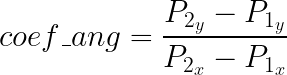

Com a intersecção da reta no eixo y (onde x1 = 0) - chamado de y_intercept e o coeficiente angular, podemos reescrever a equação da reta da seguinte forma:

image.png

Para essa questão 1, vamos utilizar o a versão mais simplificada do dataset Iris. Ele possui 3 classes e 4 atributos. Nós vamos usar uma das classes que estão mais "separadas" e uma das que estão mais "misturadas". O objetivo é treinar o Perceptron e tirar uma reta dos seus pesos. Ou seja, calcular os valores da reta. 

In [ ]:
from sklearn.linear_model import Perceptron
# Treinando o Perceptron
# Encontrando coeficiente angular e intersecção da reta no eixo y
# Seu codigo aqui

perceptron = Perceptron(tol=1e-3, random_state=0)
#perceptron = Perceptron()
#perceptron = Perceptron(penalty='elasticnet', random_state=42)

perceptron.fit(X, y)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
perceptron.score(X, y)

0.99

In [ ]:
w1, w2 = perceptron.coef_.reshape(-1)
w0 = perceptron.intercept_[0]

# w0 + w1*x1 +  w2*x2 = 0
#Py (0, x2)
P1y = 0
P2y = -w0 / w2

# w0 + w1*x1 +  w2*x2 = 0
#Px (x1, 0)
P1x = 0
P2x = w0 / w1

coef_ang = (P2y - P1y) / (P2x - P1x)
y_intercept = (0 - w0) / w2

# coef_ang = -w1 / w2
# y_intercept = (0 - w0) / w2

func_rect = lambda X: np.array([coef_ang*x + intercept for x in X])

print(coef_ang)
print(y_intercept)

0.5994832041343667
-0.12919896640826872


[4.165 7.135]
[2.36764858 4.1481137 ]


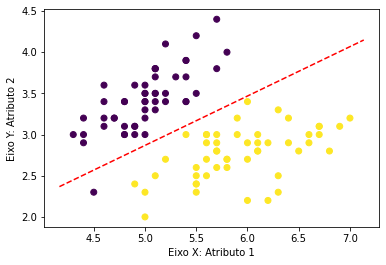

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np    

def decision_line(X, y, intercept, coef_ang):
    """Plota linha usando inclinação e coef angular"""
    axes = plt.gca()
    plt.scatter(*X.T, c=y)
    x_vals = np.array(axes.get_xlim())
    # Implemente aqui a equação da reta
    print(x_vals)
    #func_rect = lambda X: np.array([coef_ang*x + intercept for x in X])
    #y_vals = func_rect(x_vals)
    y_vals = intercept + coef_ang * x_vals
    print(y_vals)
    plt.plot(x_vals, y_vals, '--', color='red')
    plt.xlabel('Eixo X: Atributo 1')
    plt.ylabel('Eixo Y: Atributo 2')

decision_line(X, y, y_intercept, coef_ang)



---

### Questão 3.
- Para classificar os modelos que serão testados, implemente a função `evaluate_model()`. Essa função recebe um modelo de classificador genérico (`model`) e avalia sua acurácia utilizando 10-fold cross-validation, retornando a média das 10 acurácias. O parâmetro `X` indica os dados e `y` os labels.

- Para garantir uma melhor performance dos algoritmos, faça o preprocessamento desses dados através da classe `sklearn.preprocessing.StandardScaler`.


In [ ]:
X.shape

(100, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


def evaluate_model(model, X, y): 
  
  #pré-processamento
  scaler = StandardScaler()
  scaler.fit(X)
  X = scaler.transform(X)
  
  scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
  return scores.mean()

scores = evaluate_model(perceptron, X, y)

print(scores)

0.9800000000000001




---

### Questão 4.

Agora para estruturar e organizar melhor nossos testes, vamos utilizar as estruturas de dicionário do Python. Por exemplo, se formos definir dois modelos de Multi-Layer Perceptron, podemos escrever:


Isso pode ser feito pois o Python trata funções como funções de primeira classe. Isso é, funções podem ser tratadas como variáveis. 

Portanto, defina um dicionário de experimentos com ao menos 3 modelos de MLP (`sklearn.neural_network.MLPClassifier`). Para isso varie parâmetros como o número de camadas escondidas, função de ativação e número de neurônios.

- Dica: Ver documentação em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np

parameters = {
    "MLP camada oculta (100,1)": MLPClassifier(hidden_layer_sizes=(100,1), random_state=0),
    "MLP camada oculta (100,2)": MLPClassifier(hidden_layer_sizes=(100,2), random_state=0),
    "MLP camada oculta (100,3)": MLPClassifier(hidden_layer_sizes=(100,3), random_state=0),
    "MLP Nº Máximo de Iterações (50)": MLPClassifier(max_iter=100, random_state=0),
    "MLP Nº Máximo de Iterações (100)": MLPClassifier(max_iter=500, random_state=0),
    "MLP Nº Máximo de Iterações (200)": MLPClassifier(max_iter=1000, random_state=0),
    "MLP Funções de Ativação ('logistic')": MLPClassifier(activation='logistic', random_state=0),
    "MLP Funções de Ativação ('tanh')": MLPClassifier(activation='tanh', random_state=0),
    "MLP Funções de Ativação ('relu')": MLPClassifier(activation='relu', random_state=0),
    "MLP Otimização ('sgd') e Taxa de Aprendizagem ('constant')": MLPClassifier(solver='sgd', learning_rate='constant', random_state=0),
    "MLP Otimização ('sgd') Taxa de Aprendizagem ('invscaling')": MLPClassifier(solver='sgd', learning_rate='invscaling', random_state=0),
    #"MLP Otimização ('sgd') Taxa de Aprendizagem ('adaptative')": MLPClassifier(solver='sgd', learning_rate='adaptative', early_stopping=True),
    "MLP Otimização ('adam')": MLPClassifier(solver='adam', random_state=0)
 
}

# Printando o primeiro parâmetro do dicionário
MLP = parameters["MLP camada oculta (100,1)"]
MLP    
       

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 1), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)



---

### Questão 5.

Para cada modelo instanciado na Questão 4, utilize a função criada na questão 3 para calcular sua acurácia. Exiba o nome do modelo e sua acurácia e determine qual o melhor classificador dentre os especificados. Utilize o conjunto Iris completo.

In [ ]:
# Agora vamos utilizar o Iris completo
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
scores_mlp = []
scores = []
# Seu código aqui
for key, model in parameters.items():
  acc = evaluate_model(model, X, y)
  scores_mlp.append([key, acc])
  scores.append(acc)
  
  #print(key+' %2f'+str(acc))
  


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
best_classif = ''
value_best = np.max(scores)
for score in scores_mlp:
  print(score[0]+ ' -> '+str(score[1]))

  if score[1] == value_best:
    best_classif = score[0]

print('-------')
print('O melhor classificador é:')
print(best_classif + ' com acurácia de '+ str(value_best))


MLP camada oculta (100,1) -> 0.33333333333333337
MLP camada oculta (100,2) -> 0.6266666666666667
MLP camada oculta (100,3) -> 0.9533333333333334
MLP Nº Máximo de Iterações (50) -> 0.9133333333333333
MLP Nº Máximo de Iterações (100) -> 0.9666666666666666
MLP Nº Máximo de Iterações (200) -> 0.9666666666666666
MLP Funções de Ativação ('logistic') -> 0.9
MLP Funções de Ativação ('tanh') -> 0.9600000000000002
MLP Funções de Ativação ('relu') -> 0.9533333333333334
MLP Otimização ('sgd') e Taxa de Aprendizagem ('constant') -> 0.8733333333333334
MLP Otimização ('sgd') Taxa de Aprendizagem ('invscaling') -> 0.49333333333333335
MLP Otimização ('adam') -> 0.9533333333333334
-------
O melhor classificador é:
MLP Nº Máximo de Iterações (200) com acurácia de 0.9666666666666666
